# CH08_4_Generating and Training Convolution Neural Network

- Last update : 2022.04.13.

In [28]:
import numpy as np
import tensorflow as tf

## # Generating Forward propagation calculation of Convolution neural network

In [102]:
# 1. Implementing Convolution 

def forpass(self, x): 
    # Implementing 3 X 3 Convolution 
    c_out1 = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b

In [104]:
# 2. Implementing ReLU function 

def forpass(self, x): 
    ...
    # applying ReLU function 
    r_out = tf.nn.relu(c_out)
    ...

In [ ]:
# 3. Applying pooling and modifying fully connected layers 

def forpass(self, x): 
    ...
    # applying 2 X 2 max pooling
    p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
    # spreading out output except initial batch dimension 
    f_out = tf.reshape(p_out, [x.shape[0], -1])
    z1 = tf.matmul(f_out, self.w1) + self.b1   # Calculating regression function of first layer
    a1 = tf.nn.relu(z1)                        # applying activation function 
    z2 = tf.matmul(a1, self.w2) +self.b2       # Calculating regression function of second layer   
    return z2  

## # Generating Backword propagation calculation of Convolution neural network

In [106]:
# Auto defferentiation usage 

x = tf.Variable(np.array([1.0, 2.0, 3.0]))

with tf.GradientTape( ) as tape:
    y = x**3 + 2*x + 5
    
# Calculating Gradient 
print (tape.gradient(y, x))

tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


In [108]:
# 1. Implementing backward propagation calculation 

def training(self, x, y): 
    m = len(x)                        # saving the no. of samples 
    with tf.GradientTape() as tape:
        z = self.forpass(x)           # Implementing forward propagation calculation 
        # calculating loss 
        loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
        loss = tf.reduce_mean(loss)
    ...        

In [109]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = tf.nn.softmax(x)
    
# calculating gradient 
print (tape.gradient(y, x))

tf.Tensor([1.99908031e-17 5.43406367e-17 1.47713165e-16], shape=(3,), dtype=float64)


In [111]:
# 2. Calculating Gradient 

def training(self, x, y): 
    ...
    weights_list = [self.conv_w, self.conv_b, self.w1, self.b1, self.w2, self.b2]
    # Calculating gradient on the weight 
    grads = tape.gradient(loss, weights_list)
    # updating weights
    self.optimizer.apply_gradients(zip(grads, weights_list))

## # Initializing weight by making optimizer object

In [112]:
# 1. Modifying fit() method

def fit(self, x, y, epochs=100, x_val=None, y_val=None): 
    self.init_weights(x.shape, y.shape[1])      # initializing weights of hidden layers and output layers 
    self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
    # repeats the routine epoch times 
    for i in range(epochs): 
        print ("Epoch", i, end=' ')
        # circulating mini batch returned from generator function 
        batch_losses = []
        for x_batch, y_batch in self.gen_batch(x, y): 
            print ('.', end='')
            self.training(x_batch, y_batch)
            # recording batch losses
            batch_losses.append(self.get_loss(x_batch, y_batch))
        print ()
        # calculating avearage batch loss and saving it to loss
        self.losses.append(np.mean(batch_losses))
        # calculating losses on the verifying set 
        self.val_losses.append(self.get_loss(x_val, y_val))                     

In [113]:
# 2. Modifying init_weights() method
def init_weights(self, input_shape, n_classes): 
    g = tf.initializers.glorot_uniform()
    self.conv_w = tf.Variables(g((3, 3, 1, self.n_kernels)))
    self.conf_b = tf.Variables(np.zeros(self.n_kernels), dtype=float)
    n_features = 14 * 14 * self.n_kernels
    self.w1 = tf.Variables(g((n_features, self.units)))    # (No. of features, hidden layer size)
    self.b1 = tf.Variables(np.zeros(self.units), dtype = float)   # size of hidden layer
    self.w2 = tf.Variables(g((self.units, n_classes)))     # (size of hidden layer, no. of classes)
    self.b2 = tf.Variables(np.zeros(n_classes), dtype = float)  # no. of classes 

## # What is glorot_uniform( )?

In [14]:
# Initialization of weight by glorot initialization

In [88]:
class ConvolutionNetwork: 
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels         # No. of Kernel of Convolution 
        self.kernel_size = 3               # size of Kernel 
        self.optimizer = None              # Optimizer  
        self.conv_w = None                 # weight of convolution layer  
        self.conv_b = None                 # intersect of convolution layer  
        self.units = units                 # No. of neuron in hidden layer 
        self.batch_size = batch_size       # batch size 
        self.w1 = None                     # weight of hidden layer  
        self.b1 = None                     # interscept of hidden layer  
        self.w2 = None                     # weight of output layer  
        self.b2 = None                     # interscect of output layer  
        self.a1 = None                     # activation output of hidden layer  
        self.losses = []                   # Tainning loss  
        self.val_losses = []               # verifying loass 
        self.lr = learning_rate            # learning rate 
    
    def forpass(self, x):
        # Implementing 3 x 3 convulution 
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # Implementing ReLU activation function 
        r_out = tf.nn.relu(c_out)
        # Implementing 2X2 max pooling 
        p_out = tf.nn.max_pool2d(r_out, ksize = 2, strides=2, padding='VALID')
        # Spreading out output except first batch dimension 
        f_out = tf.reshape(p_out, [x.shape[0], -1])
        z1 = tf.matmul(f_out, self.w1) + self.b1       # calculating regression function of first layer 
        a1 = tf.nn.relu(z1)                            # applying activation function 
        z2 = tf.matmul(a1, self.w2) + self.b2          # calculating regression function of second layer 
        return z2 
                
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))            # (no. of features, size of hidden layer)
        self.b1 = tf.Variable(np.zeros(self.units), dtype = float)    # size of hidden layers 
        self.w2 = tf.Variable(g((self.units, n_classes)))             # (no. of hidden layers, no. of classes)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype = float)    # no. of classes 
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])         # initializing weights of hidden layer and output layer
        self.optimizer = tf.optimizers.SGD(learning_rate = self.lr)
        # repeate the routine epoch times 
        for i in range(epochs): 
            print('Epoch', i , end =' ')
            # circulating mini batch returned from generator function 
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y): 
                print ('.', end='')
                self.training(x_batch, y_batch)
                # recording batch loss 
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            # calculating batch loss average and saving it to training loss 
            self.losses.append(np.mean(batch_losses))
            # calculating loss on the verifying set 
            self.val_losses.append(self.get_loss(x_val, y_val))
            
    # mini-batch generator function         
    def gen_batch(self, x, y):          
        bins = len(x) // self.batch_size                      # frequency of mini-batch  
        indexes = np.random.permutation(np.arange(len(x)))   # shuffle the indexes 
        x = x[indexes]
        y = y[indexes]
        for i in range(bins): 
            start = self.batch_size * i 
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]    # returning the value after slicing it in batch_size
        
    def training(self, x, y): 
        m = len(x)
        with tf.GradientTape() as tape:
            z = self.forpass(x)                 # implementing forward propagation calculation 
            # calculating the loss 
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)
            
        weights_list = [self.conv_w, self.conv_b, self.w1, self.b1, self.w2, self.b2]
        
        # Calculating gradient on the weights 
        grads = tape.gradient(loss, weights_list)
        # updating weights
        self.optimizer.apply_gradients(zip(grads, weights_list))        
        
    def predict(self, x): 
        z = self.forpass(x)                      # Implementing forward propagation calculation 
        return np.argmax(z.numpy(), axis=1)
            
    def score(self, x, y): 
        # returning True ratio after comparing prediction to target row vector
        return np.mean(self.predict(x) == np.argmax(y, axis=1))
                
    def get_loss(self, x, y): 
        z = self.forpass(x)                      # Implementing forward propagation calculation 
        # saving loss after calculation 
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

## # Training Convolution Neural Network

In [89]:
# 1. Loading Dataset
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [90]:
# 2. Spliting Training Dataset into training set and verifying set
from sklearn.model_selection import train_test_split 

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [91]:
# 3. Transforming target into one-hot incoding
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [92]:
# 4. Preparing input data
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

x_train.shape

(48000, 28, 28, 1)

In [93]:
# 5. Standardization Preprocessing for Input data 
x_train = x_train / 255
x_val = x_val /255

In [94]:
# 6. Training Model

cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size= 128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, x_val=x_val, y_val=y_val_encoded, epochs=20)

Epoch 0 .......................................................................................................................................................................................................................................................................................................................................................................................
Epoch 1 .......................................................................................................................................................................................................................................................................................................................................................................................
Epoch 2 ................................................................................................................................................................................................................................

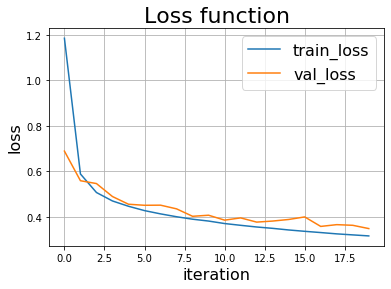

In [100]:
# 7. Plotting Training loss and verifying loss and Checking out accuracy

import matplotlib.pyplot as plt

plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss', fontsize="16")
plt.xlabel('iteration', fontsize="16")
plt.title('Loss function', fontsize="22")

plt.legend(['train_loss', 'val_loss'], fontsize="16")
plt.grid()
plt.show()

In [101]:
cn.score(x_val, y_val_encoded)

0.8791666666666667